# TEST FULL CODE NOTEBOOK

In [7]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
import tensorflow as tf



In [1]:
# import tensorflow as tf
# hello = tf.constant('Hello, TensorFlow!')
# sess = tf.Session()
# sess.run(hello)
# 'Hello, TensorFlow!'
# a = tf.constant(10)
# b = tf.constant(32)
# sess.run(a + b)

# sess.close()

In [8]:
df = pd.read_csv('alternative_dataset.csv', low_memory=False)

In [9]:
df['Timestamp'] = df['Timestamp'].astype(np.datetime64)
df = df.set_index('Timestamp')

In [10]:
df.head()

,os_code,vCPU,memory,savings_on_demand,interrupt_freq,Zone_code,InstanceType_code,Price
Timestamp,,,,,,,,
2019-03-30 11:00:00,0,2.0,16.0,0.0,3.0,2,190,0.2110
2019-03-30 11:32:00,0,4.0,16.0,71.0,0.0,2,93,0.0646
2019-03-30 11:32:00,1,4.0,30.5,62.0,0.0,2,55,0.4014
2019-03-30 11:32:00,0,4.0,30.5,70.0,0.0,2,55,0.2814
2019-03-30 11:32:00,0,2.0,8.0,76.0,0.0,2,110,0.0323


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279059 entries, 2019-03-30 11:00:00 to 2019-05-30 12:16:28
Data columns (total 8 columns):
os_code              279059 non-null int64
vCPU                 266301 non-null float64
memory               266301 non-null float64
savings_on_demand    266301 non-null float64
interrupt_freq       266301 non-null float64
Zone_code            279059 non-null int64
InstanceType_code    279059 non-null int64
Price                279059 non-null float64
dtypes: float64(5), int64(3)
memory usage: 19.2 MB


In [12]:
df.shape

(279059, 8)

In [13]:
df.describe()

,os_code,vCPU,memory,savings_on_demand,interrupt_freq,Zone_code,InstanceType_code,Price
count,279059.000000,266301.000000,266301.000000,266301.000000,266301.000000,279059.000000,279059.000000,279059.000000
mean,0.259031,26.738612,182.245708,60.840444,2.836125,1.332758,94.017641,1.298104
std,0.438104,30.201726,340.671748,21.726850,1.228902,1.239508,51.574512,2.601403
min,0.000000,1.000000,0.500000,-52.000000,0.000000,0.000000,0.000000,0.001400
25%,0.000000,4.000000,30.000000,57.000000,2.000000,0.000000,47.000000,0.135500
50%,0.000000,16.000000,64.000000,68.000000,3.000000,1.000000,98.000000,0.362100
75%,1.000000,36.000000,192.000000,73.000000,4.000000,3.000000,134.000000,1.136600
max,1.000000,128.000000,3904.000000,90.000000,4.000000,3.000000,192.000000,35.628000


In [14]:
df.columns

Index(['os_code', 'vCPU', 'memory', 'savings_on_demand', 'interrupt_freq',
       'Zone_code', 'InstanceType_code', 'Price'],
      dtype='object')

In [15]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[1, 2, 3, 4]

In [16]:
# filling nan with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [17]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

os_code              0
vCPU                 0
memory               0
savings_on_demand    0
interrupt_freq       0
Zone_code            0
InstanceType_code    0
Price                0
dtype: int64

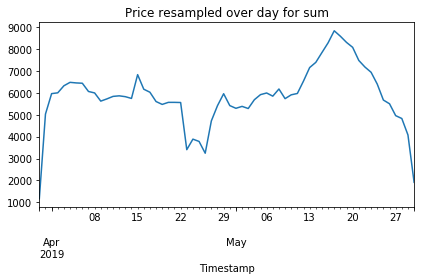

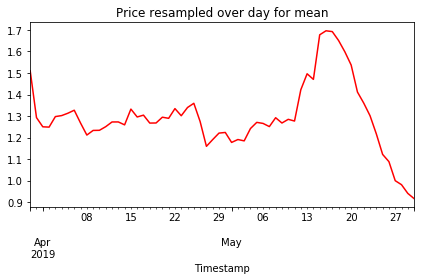

In [18]:
df.Price.resample('D').sum().plot(title='Price resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Price.resample('D').mean().plot(title='Price resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

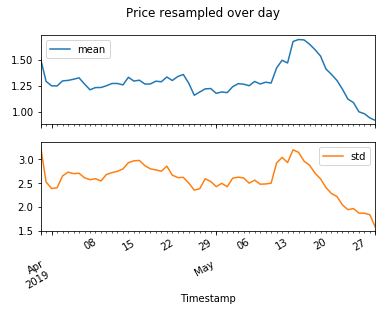

In [19]:
### Below I show mean and std of Price resampled over day 
r = df.Price.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Price resampled over day')
plt.show()

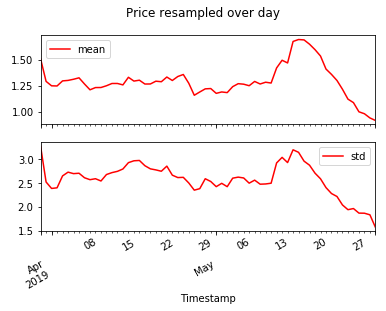

In [20]:
### Below I show mean and std of Price resampled over day
r2 = df.Price.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Price resampled over day', color='red')
plt.show()

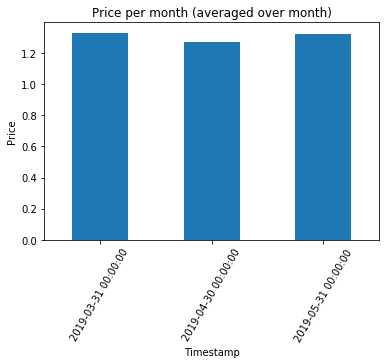

In [21]:
### Sum of Price resampled over month
# Sum of Price resampled over month
df['Price'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Price')
plt.title('Price per month (averaged over month)')
plt.show()

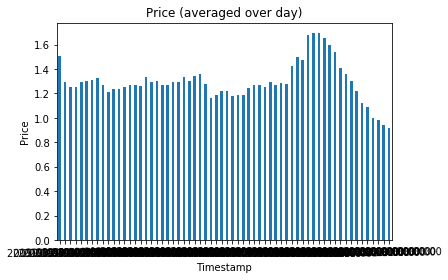

In [22]:
## Mean of Price resampled over quarter
df['Price'].resample('D').mean().plot(kind='bar')
plt.xticks(rotation=1)
plt.ylabel('Price')
plt.title('Price (averaged over day)')
plt.show()

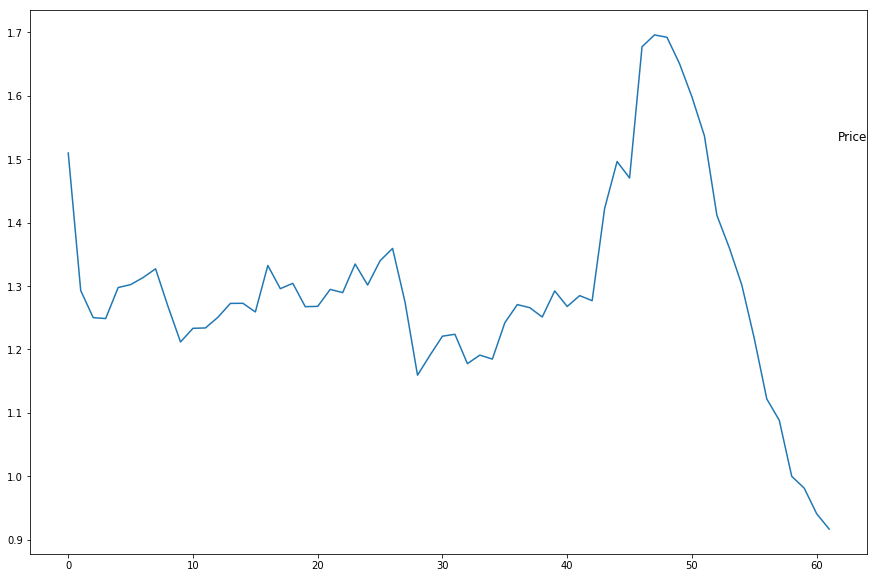

In [23]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [7]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

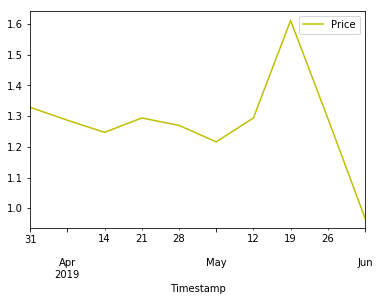

In [24]:
## resampling over week and computing mean
df.Price.resample('W').mean().plot(color='y', legend=True)
# df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
# df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
# df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

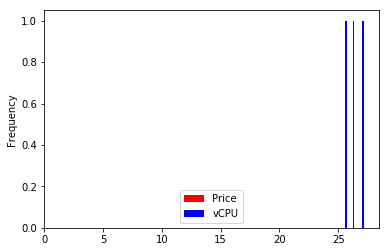

In [25]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Price.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.vCPU.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
# df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
# df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

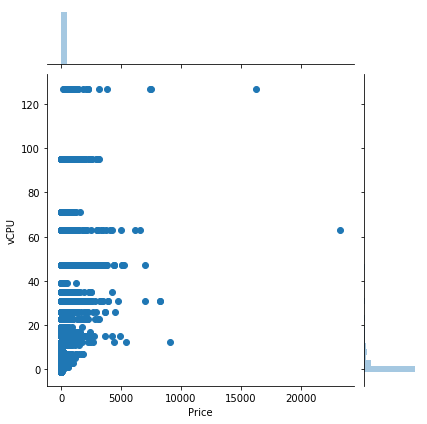

In [26]:
## The correlations between 'Global_intensity', 'Global_active_power'
data_returns = df.pct_change()
sns.jointplot(x='Price', y='vCPU', data=data_returns)  
plt.show()

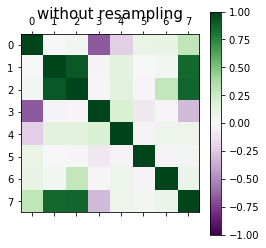

In [27]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

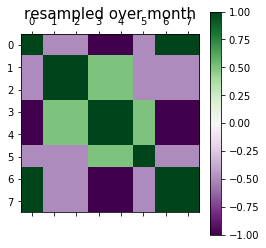

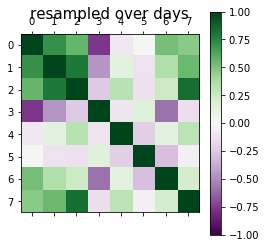

In [28]:
# Correlations of mean of features resampled over months


plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
# plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.matshow(df.resample('D').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over days', size=15)
plt.colorbar()
plt.show()

In [29]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [30]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(1466, 8)

In [31]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.869497   0.000000   0.000000   0.318533   0.000000   0.415546   
2   0.832775   1.000000   0.558589   0.168166   0.659678   0.671703   
3   1.000000   0.425989   0.724521   0.350376   0.510192   0.398460   
4   0.899053   0.213067   0.124590   0.305693   0.511617   0.544970   
5   0.734850   0.635861   1.000000   0.430764   0.531477   0.426516   

   var7(t-1)  var8(t-1)   var7(t)   var8(t)  
1   0.424200   0.256195  0.619257  0.566359  
2   0.619257   0.566359  0.375246  0.494290  
3   0.375246   0.494290  0.558699  0.200919  
4   0.558699   0.200919  1.000000  0.792754  
5   1.000000   0.792754  0.623878  0.239956  


In [32]:
# split into train and test sets
values = reframed.values

n_train_time = 60*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1440, 1, 9) (1440,) (25, 1, 9) (25,)


In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 1440 samples, validate on 25 samples
Epoch 1/20


In [ ]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()